# Understand Quadratic Weighted Kappa (QWK)

### What is QWK

See: https://www.kaggle.com/c/data-science-bowl-2019/overview/evaluation

### Explaniation of QWK

See:

https://www.kaggle.com/c/data-science-bowl-2019/discussion/114539

https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps

### Calculation steps

- **Step-1**: Under Step-1, we shall be calculating a confusion_matrix between the Predicted and Actual values. 
- **Step-2**: Under Step-2, under step-2 each element is weighted. Predictions that are further away from actuals are marked harshly than predictions that are closer to actuals. We will have a less score if our prediction is 5 and actual is 3 as compared to a prediction of 4 in the same case.
- **Step-3**: We create two vectors, one for preds and one for actuals, which tells us how many values of each rating exist in both vectors.
- **Step-4**: E is the Expected Matrix which is the outer product of the two vectors calculated in step-3.
- **Step-5**: Normalise both matrices to have same sum. Since, it is easiest to get sum to be '1', we will simply divide each matrix by it's sum to normalise the data.
- **Step-6**: Calculated numerator and denominator of Weighted Kappa and return the Weighted Kappa metric as 1-(num/den)
- **Meaning of E matrix**: given the histograms of truth and prediction, assuming there's no correlation between them, then E is the 'expected' confusion matrix.

### Impementation of QWK

See: https://www.kaggle.com/cpmpml/ultra-fast-qwk-calc-method

Scikit-learn function: `cohen_kappa_score(y1, y2, weights='quadratic')`


### Range of QWK score

- A perfect score of 1.0 is granted when both the predictions and actuals are the same.
- Random guess would yield a score of 0.
- The least possible score is -1 which is given when the predictions are furthest away from actuals, and is worse than random guess.
- Generally a score of 0.6+ is considered to be a really good score.

In [1]:
import os
from sys import getsizeof
import time
import re
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
def my_QWK(y_truth, y_pred, n=4, hist_range=(0, 3)):
    y_truth = np.array(y_truth)
    y_pred = np.array(y_pred)
    m = len(y_truth)  # number of samples
    
    # calculate O
    O = confusion_matrix(y_truth, y_pred, np.arange(n))
    
    # calculate W
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i][j] = ((i - j) ** 2) / ((n - 1) ** 2)
    
    # calculate E
    hist_truth = np.histogram(y_truth, bins=n, range=hist_range)[0]
    hist_pred  = np.histogram(y_pred,  bins=n, range=hist_range)[0]
    E = np.outer(hist_truth, hist_pred)
    E = E / np.sum(E) * m

    # plot O, W, E
    fig, ax = plt.subplots(1, 5, figsize=(25, 4))
    sns.heatmap(O, annot=True, ax=ax[0])
    sns.heatmap(W, annot=True, ax=ax[1])
    sns.heatmap(E, annot=True, ax=ax[2])
    ax[0].set_title('O Matrix')
    ax[1].set_title('W Matrix')
    ax[2].set_title('E Matrix')
    for i in range(3):
        ax[i].set_xlabel('Prediction')
        ax[i].set_ylabel('Truth')
        ax[i].set_xticks(np.arange(n) + 0.5)
        ax[i].set_yticks(np.arange(n) + 0.5)
    ax[3].hist(y_truth)
    ax[3].set_title('Histogram of Truth')
    ax[4].hist(y_pred)
    ax[4].set_title('Histogram of Prediction')
    
    QWK = 1 - np.sum((W * O)) / np.sum((W * E))
#     temp = 1 - np.sum((W * O)) / m
#     print(temp)
    return QWK

r2 = -0.4995383194829175
QWK = 0.27305282005371523


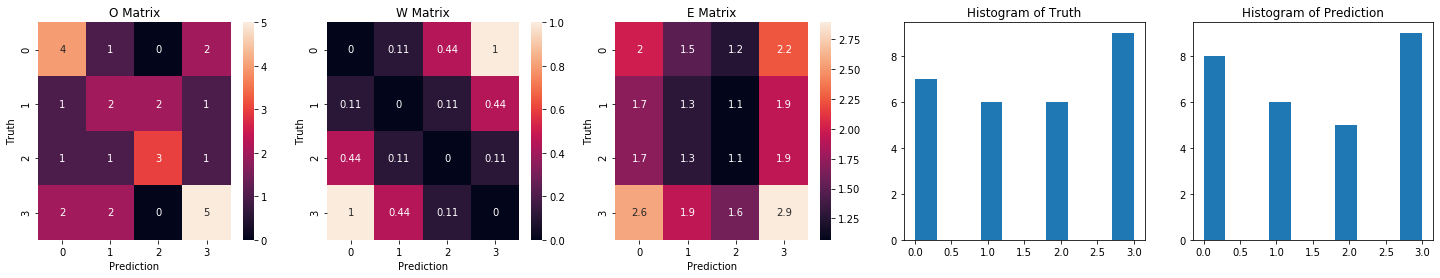

In [3]:
y_truth = [0, 2, 2, 3, 3, 3, 1, 0, 2, 1, 0, 3, 3, 1, 0, 2, 1, 0, 3, 2, 3, 3, 3, 1, 0, 2, 1, 0,]
y_pred  = [1, 2, 0, 3, 0, 3, 2, 3, 1, 3, 0, 1, 1, 2, 0, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 2, 1, 0,]

r2 = r2_score(y_truth, y_pred) 
qwk = my_QWK(y_truth, y_pred)
print('r2 = {}'.format(r2))
print('QWK = {}'.format(qwk))
# cohen_kappa_score(y_truth, y_pred, weights='quadratic')

r2 = 0.0
QWK = 0.0


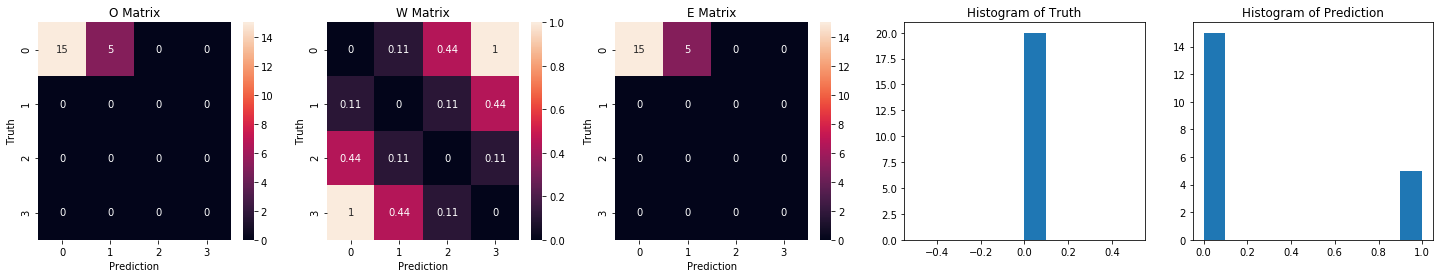

In [7]:
y_truth = [0] * 20
y_pred  = [0] * 15 + [1] * 5

r2 = r2_score(y_truth, y_pred) 
qwk = my_QWK(y_truth, y_pred)
print('r2 = {}'.format(r2))
print('QWK = {}'.format(qwk))
# cohen_kappa_score(y_truth, y_pred, weights='quadratic')

### Example: Guess all sample in one class

r2 = -1.0
QWK = 0.0


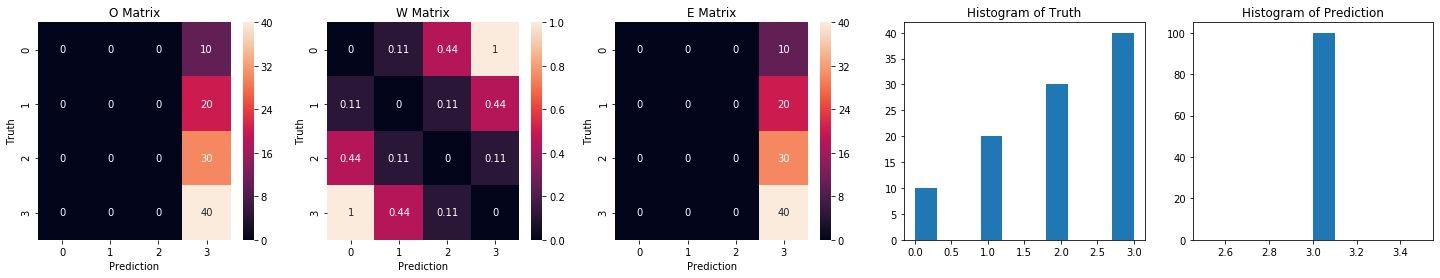

In [70]:
y_truth = [0] * 10 + [1] * 20 + [2] * 30 + [3] * 40
y_pred  = [3] * 100

r2 = r2_score(y_truth, y_pred) 
qwk = my_QWK(y_truth, y_pred)
print('r2 = {}'.format(r2))
print('QWK = {}'.format(qwk))

### Example: Random guess

r2 = -1.5619999999999998
QWK = -0.02071713147410348


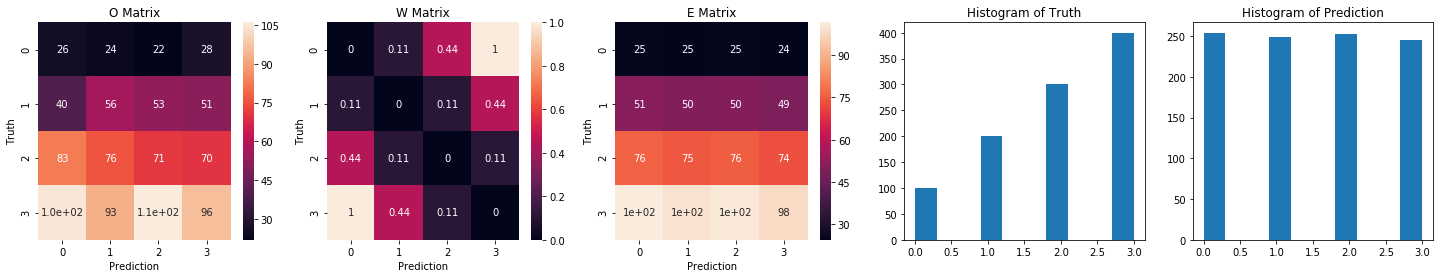

In [71]:
y_truth = [0] * 100 + [1] * 200 + [2] * 300 + [3] * 400
y_pred  = np.random.randint(4, size=1000)

r2 = r2_score(y_truth, y_pred) 
qwk = my_QWK(y_truth, y_pred)
print('r2 = {}'.format(r2))
print('QWK = {}'.format(qwk))

### Example: Distributed guess 

r2 = -1.0019999999999998
QWK = -0.001000000000000112


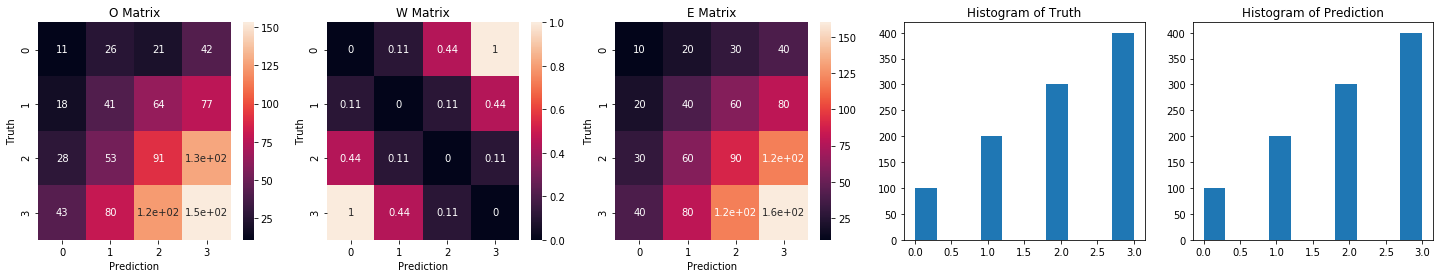

In [72]:
y_truth = [0] * 100 + [1] * 200 + [2] * 300 + [3] * 400
y_pred  = np.array(y_truth).copy()
np.random.shuffle(y_pred)

r2 = r2_score(y_truth, y_pred) 
qwk = my_QWK(y_truth, y_pred)
print('r2 = {}'.format(r2))
print('QWK = {}'.format(qwk))